#**Aula 4:**

- Efeito da sazonalidade e feriados em uma série temporal;

- Sazonalidade aditiva e sazonalidade multiplicativa;

- Previsões considerando sazonalidade e feriados com o PROPHET.

In [1]:
#importando as bibliotecas:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://github.com/vqrca/bootcamp_alura_aulas/blob/main/Modulo_3/dados_covid_sp.zip?raw=true'

In [3]:
#Importando os dados:
dados = pd.read_csv(url, sep = ';', compression='zip')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [4]:
#formatando os dados da coluna 'datahora':
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [80]:
#Escolhendo um município específico:
ados_sp = dados.query('nome_munic == "São Paulo"')

In [81]:
#dados para treino
df = pd.DataFrame()
df['ds'] = dados_sp['datahora'][:400]
df['y'] = dados_sp['casos_novos'][:400]

In [75]:
#dados para teste
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] =dados_sp['casos_novos'][400:]

In [82]:
modelo = Prophet(n_changepoints=10)
#n_changepoints: recortes

In [83]:
modelo.add_country_holidays(country_name='BR')

In [84]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
dataFramefuture = modelo.make_future_dataframe(periods=43)
dataFramefuture.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [86]:
previsao = modelo.predict(dataFramefuture)

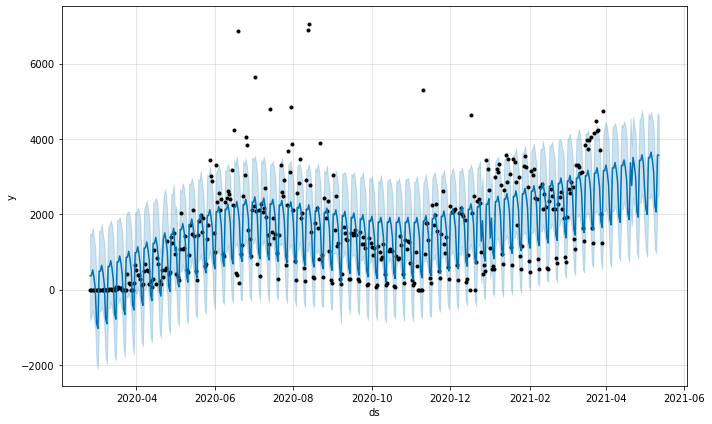

In [87]:
fig = modelo.plot(previsao, figsize=(10,6))


In [88]:
#Usando feriados específicos do município de SP

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]

#Adicionando as listas ao DataFrame 
feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021)) #união das informações 

In [89]:
# Usando os feriados do município de SP

modelo_feriados = Prophet(n_changepoints = 25, changepoint_prior_scale=10.0, holidays=feriados)
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=36)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,sp_2020,sp_2020_lower,sp_2020_upper,sp_2021,sp_2021_lower,sp_2021_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-145.406161,-877.227140,1092.945230,-145.406161,-145.406161,246.153690,246.153690,246.153690,-213.547359,-213.547359,-213.547359,-213.547359,-213.547359,-213.547359,0.0,0.0,0.0,459.701049,459.701049,459.701049,0.0,0.0,0.0,100.747530
1,2020-02-26,-134.933910,-858.514668,1159.920223,-134.933910,-134.933910,244.252573,244.252573,244.252573,-213.547359,-213.547359,-213.547359,-213.547359,-213.547359,-213.547359,0.0,0.0,0.0,457.799932,457.799932,457.799932,0.0,0.0,0.0,109.318663
2,2020-02-27,-124.461660,-530.332633,1451.321962,-124.461660,-124.461660,593.142451,593.142451,593.142451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,593.142451,593.142451,593.142451,0.0,0.0,0.0,468.680791
3,2020-02-28,-113.989409,-782.751369,1256.544000,-113.989409,-113.989409,350.661173,350.661173,350.661173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,350.661173,350.661173,350.661173,0.0,0.0,0.0,236.671764
4,2020-02-29,-103.517159,-1067.857837,900.585393,-103.517159,-103.517159,46.657146,46.657146,46.657146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,46.657146,46.657146,46.657146,0.0,0.0,0.0,-56.860013


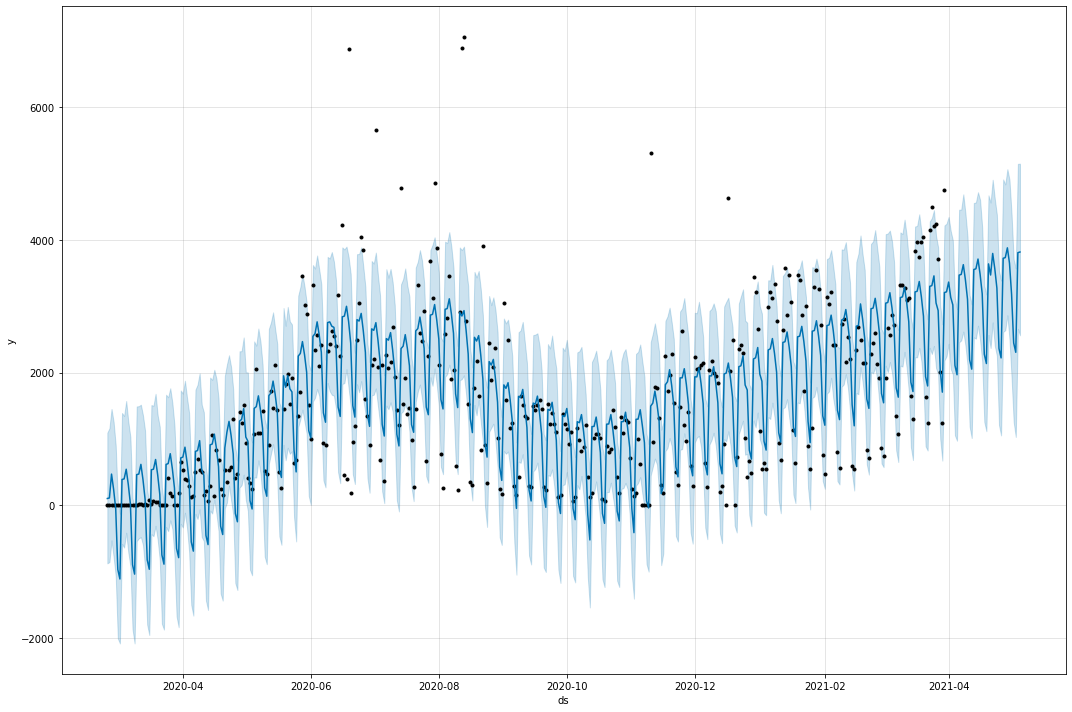

In [65]:
fig = modelo_feriados.plot(previsao, figsize=(15,10));

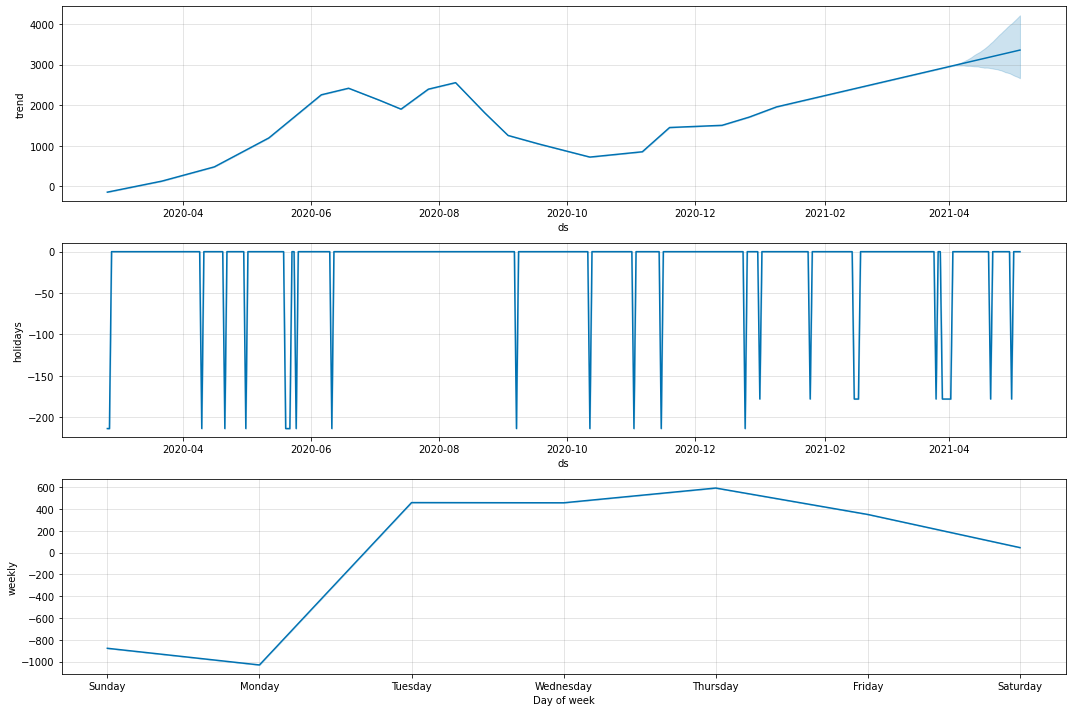

In [66]:
modelo_feriados.plot_components(previsao, figsize=(15,10));


O gráfico Holidays mostra informações pontuais, que representam o impacto dos feriados, com decréscimo de casos notificados.

Weekly mostra que aos domingos e segundas temos menos casos notificados.

Podemos percerber que há uma baixa nos casos notificados, quando os dias úteis se tornam feriados.

Houve menos contaminação ou menos notificação dos casos???


Visualização dos dados de feriado com sobreposição de linhas nos pontos:

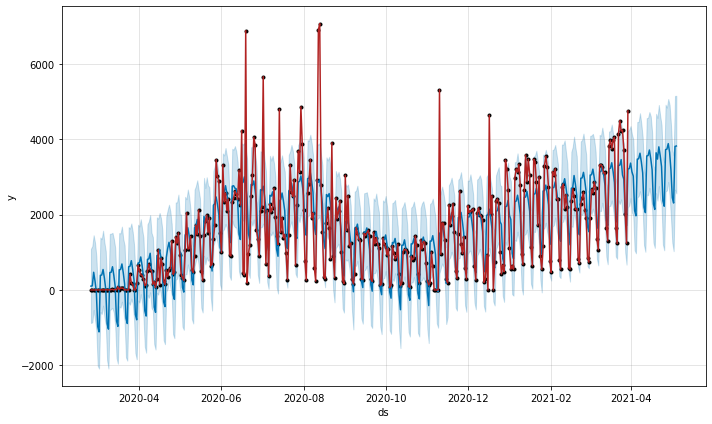

In [72]:
fig = modelo_feriados.plot(previsao, figsize=(10,6));
plt.plot(df['ds'], df['y'], color='firebrick')

###**Sazonalidade**

Pode ser:

Aditiva ou Multiplicativa

In [104]:
#aditiva
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='additive',holidays=feriados, weekly_seasonality=7) #'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [107]:
#multiplicativa
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative',holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


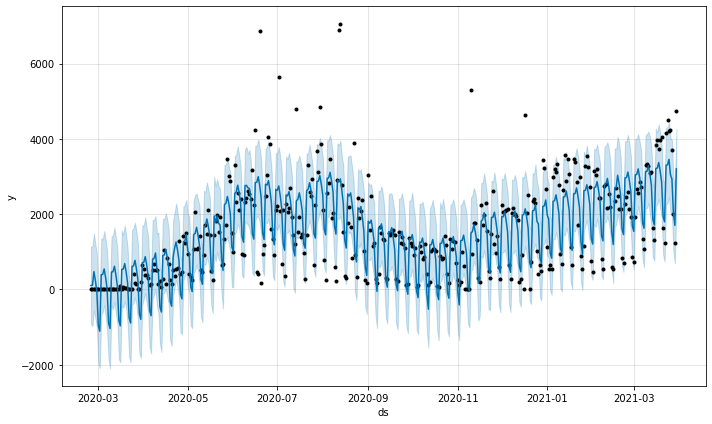

In [44]:
#aditiva
fig = modelo.plot(previsao, figsize=(10,6));


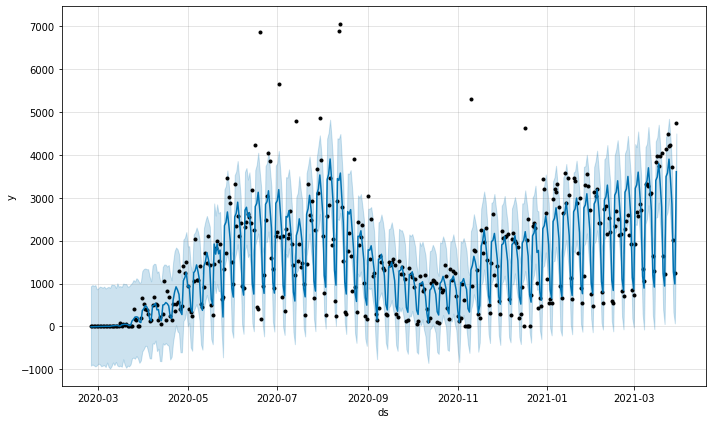

In [96]:
#multiplicativa
fig = modelo.plot(previsao, figsize=(10,6));

Para medir o ajuste dos dados utilizando o scikit-learn:
quanto mais próximo de zero melhor está sendo nosso resultado.

In [49]:
#Sazonalidade aditiva
mean_absolute_error(df['y'],previsao['yhat'][:400]) #comparando os pontos pretos com a linha azul

536.6745979333522

In [51]:
#Sazonalidade multiplicativa
mean_absolute_error(df['y'],previsao['yhat'][:400])

449.7266549322682

Portanto, a sazonalidade multiplicativa nos deu um resultado melhor aos dados de treino.

##**Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.**

In [103]:
from sklearn.metrics import median_absolute_error #Median absolute error output is non-negative floating point. The best value is 0.0
from sklearn.metrics import mean_squared_error #A non-negative floating point value (the best value is 0.0)
from sklearn.metrics import explained_variance_score #Best possible score is 1.0, lower values are worse.
from sklearn.metrics import r2_score #Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
from sklearn.metrics import mean_tweedie_deviance #A non-negative floating point value (the best value is 0.0)

**Sazonalidade aditiva:**

In [105]:
median_absolute_error(y_true = df['y'], y_pred=previsao['yhat'][:400])

396.78100604563895

In [106]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:400])

609351.3018078558

In [92]:
explained_variance_score(y_true = df['y'], y_pred=previsao['yhat'][:400])

0.6328074279946918

In [93]:
r2_score(y_true = df['y'], y_pred=previsao['yhat'][:400])

0.6328074279873375

In [94]:
mean_tweedie_deviance(df['y'], previsao['yhat'][:400], power=0)

609351.3018078558

**Sazonalidade multiplicativa:**

In [108]:
median_absolute_error(y_true = df['y'], y_pred=previsao['yhat'][:400])

273.23668088831727

In [109]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:400])

520757.01996053784

In [97]:
explained_variance_score(y_true = df['y'], y_pred=previsao['yhat'][:400])

0.6862009648903784

In [98]:
r2_score(y_true = df['y'], y_pred=previsao['yhat'][:400])

0.6861939754856627

In [99]:
mean_tweedie_deviance(df['y'], previsao['yhat'][:400], power=0)

520757.01996053784

Na sazonalidade multiplicativa temos resultados melhores em todas as métricas quando comparamos com as métricas de sazonalidade aditiva.


###**Funções**

Criei uma função para adicionar os feriados, a sazonalidade multiplicativa e obter os gráficos:

In [112]:
def casos_novos_holidays_sazonalidade(dados): 

  df = pd.DataFrame()
  df['ds'] = dados['datahora'][:400]
  df['y'] = dados['casos_novos'][:400]
  modelo_feriados = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative',holidays=feriados, weekly_seasonality=7)
  modelo_feriados.fit(df)
  dataframefuturo = modelo_feriados.make_future_dataframe(periods=36)
  previsao = modelo_feriados.predict(dataframefuturo)
  modelo_feriados.plot(previsao,xlabel='Data',ylabel='Número de casos novos', figsize=(10,6));
  modelo_feriados.plot_components(previsao, figsize=(10,6));

Testando a função:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


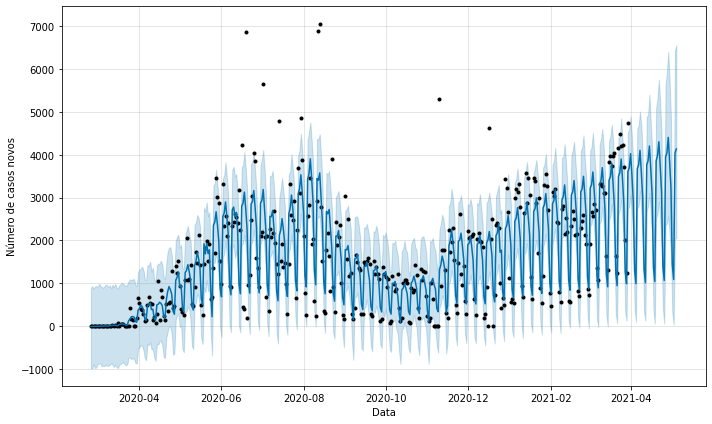

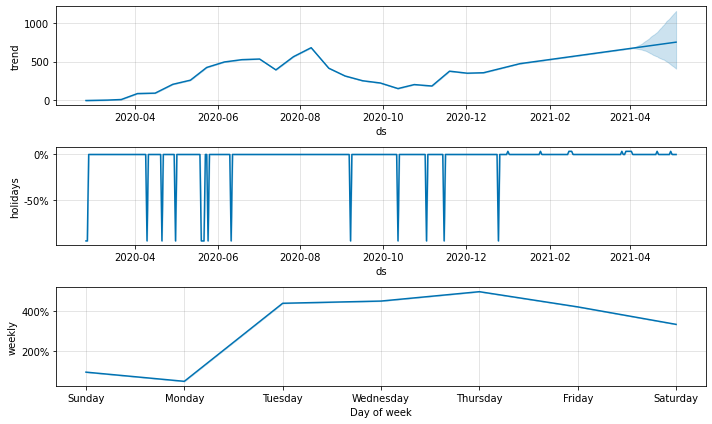

In [113]:
casos_novos_holidays_sazonalidade(dados_sp)

In [110]:
#Considerando somente os feriados
def casos_novos_holidays(dados): 

  df = pd.DataFrame()
  df['ds'] = dados['datahora'][:400]
  df['y'] = dados['casos_novos'][:400]
  modelo_feriados = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0,holidays=feriados)
  modelo_feriados.fit(df)
  dataframefuturo = modelo_feriados.make_future_dataframe(periods=36)
  previsao = modelo_feriados.predict(dataframefuturo)
  modelo_feriados.plot(previsao,xlabel='Data',ylabel='Número de casos novos', figsize=(10,6));
  modelo_feriados.plot_components(previsao, figsize=(10,6));

Testando a função:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


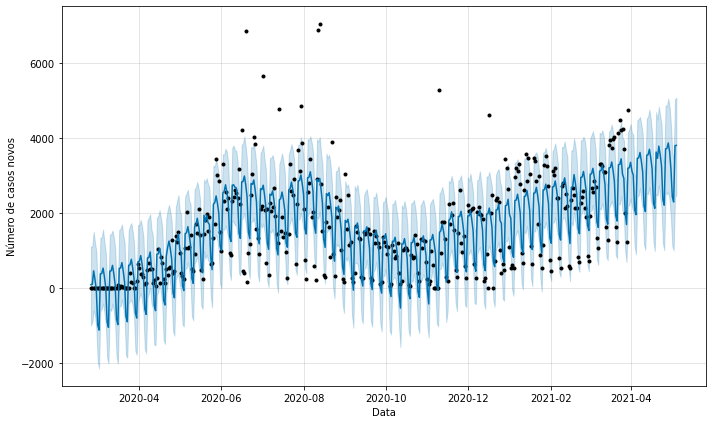

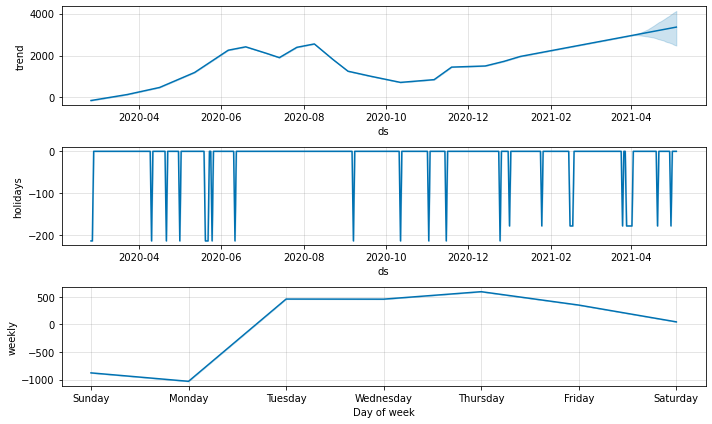

In [111]:
casos_novos_holidays(dados_sp)